# Add your Name: Paras Rupani <br> 
# StudentID: 8961758<br>
# Please submit the notebook and HTML version of your notebook to EConestoga Dropbox

# **Question 1 - Pandas** (12 marks)

- Using RegularSeasonCompactResults.csv
- and Teams.csv

In [1]:
# Using RegularSeasonCompactResults.csv
# 1- Create a filter to show if there are any draw matches
# 2- Apply the filter to the dataframe
# 3- SHOW the dataframe length or count (4 marks)
## TODO: Your code should be here

import pandas as pd

df = pd.read_csv('../in_class/CSV/RegularSeasonCompactResults.csv')
print(df.head())

draw_matches = df['Wscore'] == df['Lscore']
filtered_data = df[draw_matches]

num_draw = len(filtered_data)
print("\nDraw Matches:", num_draw)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985      20   1228      81   1328      64    N      0
1    1985      25   1106      77   1354      70    H      0
2    1985      25   1112      63   1223      56    H      0
3    1985      25   1165      70   1432      54    H      0
4    1985      25   1192      86   1447      74    H      0

Draw Matches: 0


In [2]:
# Using RegularSeasonCompactResults.csv
# 1- Create a filter showing the entries where the winningteamID= 1400- (last two digits of your id)
# 2- Create another filter for the season of 2013
# 3- Apply the filter to the dataframe
# 4- Show the resulted dataframe (4 marks)
# (Example: IF your id is 8000021, the winning team id = 1400-21= 1389)
# TODO: Your code should be here

my_id = 58
win_filter = df['Wteam'] == 1400 - my_id
season_filter = df['Season'] == 2013

result_filter = df[win_filter & season_filter]

print(result_filter)


        Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
126764    2013      75   1342      68   1251      60    H      0
127090    2013      82   1342      82   1255      71    A      0
127536    2013      93   1342      57   1205      54    H      0
128054    2013     103   1342      64   1457      57    H      0
128358    2013     110   1342      68   1154      65    H      0


In [3]:
# Using RegularSeasonCompactResults.csv & Teams.csv
# 1- Load and merge both dataframes
# 2- Where the merge is on WinningTeamId (RegularSeasonCompactResults) and TeamId (Teams.csv)
# 3- Name the dataframe: DFCombined
# 4- Show the top 3 rows (4 marks)
# TODO: Your code should be here

team_df = pd.read_csv("../in_class/CSV/Teams.csv")
DFCombined = pd.merge(df, team_df, left_on='Wteam', right_on='Team_Id')

print(DFCombined.head(3))

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Team_Id Team_Name
0    1985      20   1228      81   1328      64    N      0     1228  Illinois
1    1985      25   1228      64   1226      44    N      0     1228  Illinois
2    1985      27   1228      75   1332      72    N      3     1228  Illinois


# **Question 2 - Visualizations**

## **Part I** 

Using the following dataset: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv choose the most convenient graph to show the following, each question in **one** graph, using the library of your choice:
(18 Marks)


**1. The relationship between the penguin's bill length and bill depth for each species.** (5 marks)

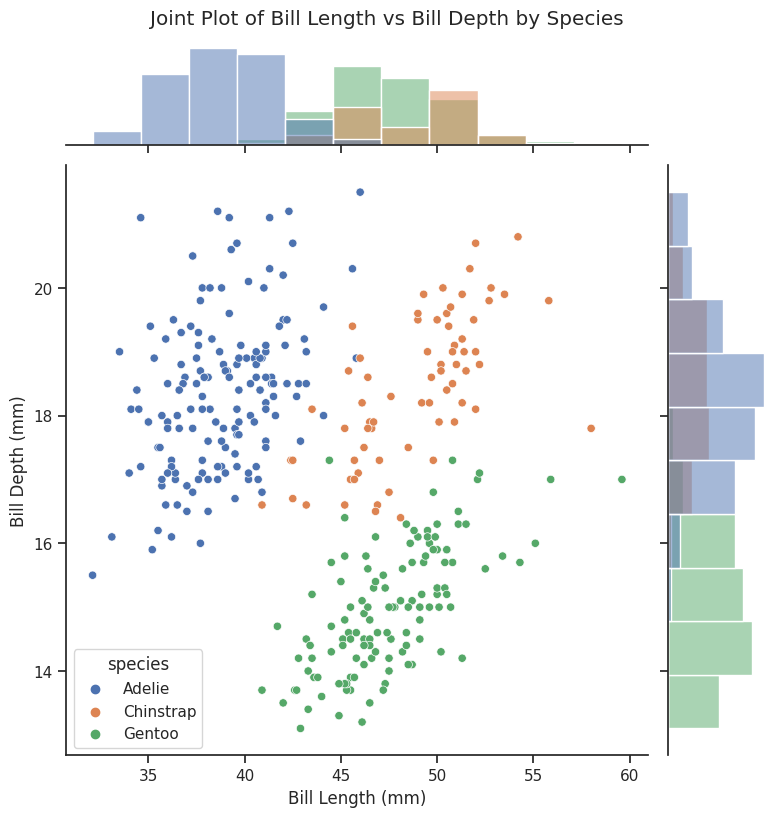

In [4]:
## TODO: Check your attributes, make a graph using Matplotlib or Seaborn to show the relationship needed

penguin_df = pd.read_csv("../in_class/CSV/penguins.csv")

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
joint_plot = sns.JointGrid(data=df, x=penguin_df['bill_length_mm'], y=penguin_df['bill_depth_mm'], hue=penguin_df['species'], height=8)

joint_plot.plot(sns.scatterplot, sns.histplot)
joint_plot.set_axis_labels('Bill Length (mm)', 'Bill Depth (mm)')

plt.suptitle('Joint Plot of Bill Length vs Bill Depth by Species', y=1.02)
plt.show()

 **What do you observe from the graph?** (2 marks)

Your answer here:

* This scatter plot shows the relationship between bill length and bill depth of three different species of penguins: Adelie, Chinstrap, and Gentoo. The Gentoo penguins tend to have shorter but deeper bills, the Adelie have medium-length and medium-depth bills, while the Chinstrap have longer but not as deep bills.

* The histograms above the plot show the distribution of bill lengths for each species, while the histograms to the right of the plot show the distribution of bill depths for each species.

* The graph suggests that there are distinct clusters for each species indicating variations in bill length and depth among them. The Chinstrap penguins have the longest bills, while the Gentoo penguins have the deepest bills.



**Why did you choose this type of graph?** (2 marks)

Your answer here:

* Choosing the combination of Scatter Plot and Histogram provides us with a clear representation of the different species of penguins. The scatter plot in the middle allows us to directly observe the relationship between bill length and bill depth and the Histogram allows us to understand each variable's distribution clearly.

* Scatter Plots are mainly helpful in identifying the clusters and patterns in the data. Histograms provide us with greater understanding for the univariate distributions for each variable

* Hence using a joint plot gives a better understanding of the bi-variate relationships and univariate distributions in a single plot which makes it efficient for analysis.

**2. Suitable graph of the mean BMI (BMI not body_mass weight_in_kg/height(m2)) of female and male penguins. (Assume the height is the flipper length)**  (5 marks)


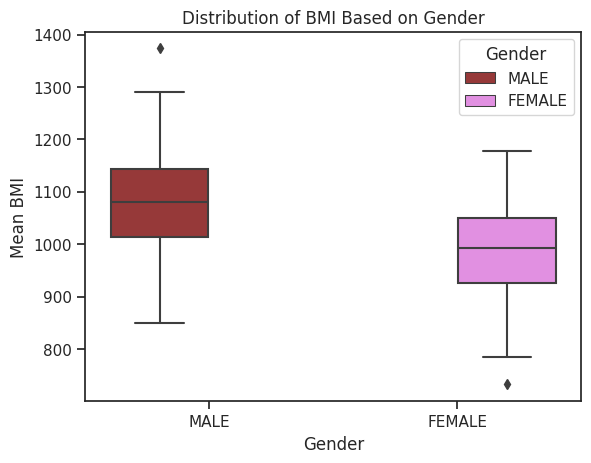

In [5]:
penguin_df['bmi'] = penguin_df['body_mass_g'] / ((penguin_df['flipper_length_mm'] / 100) ** 2)

mean_bmi_by_gender = penguin_df.groupby('sex')['bmi'].mean()

sns.set(style="ticks")
sns.boxplot(x='sex', y='bmi', data=penguin_df, hue='sex',palette=['Brown', 'Violet'])

plt.title('Distribution of BMI Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Mean BMI')
plt.legend(title='Gender', loc='upper right')
plt.show()

 **What do you observe from the graph?** (2 marks)

Your answer here:

* The graph displays the distribution of Mean BMI of all the penguin species as a whole based on their gender. We can observe that the males have a higher mean BMI when compared to female penguins. The MALE boxplot has a higher median BMI than the FEMALE’s.

* The outliers are indicated by diamond shapes above and below both the male and female boxplots which are helpful in identifying the potential errors or the edge cases in this situation can be either an obese penguin or an extremely weak which can be clarified by further inspection.

**Why did you choose this type of graph?** (2 marks)

Your answer here:

* The chosen graph is a box plot which clearly represents the Inner Quartile Range and the box itself spans the 50% of the data. This line which divides the box into two halves is the median value with respect to the genders in their individual box plots. It even includes the whiskers which show us the minimum and maximum values in the dataset.

* The outliers also being represented in the same plot help us understand the data clearly and this information collectively increases the assessment quality and interpretation becomes easier.



## **Part II**

You can find the csv file that contains the museum visitors data here: ./CSVs/museum_visitors.csv
(8 marks)

Review the data by taking a look at a few of the rows.

In [6]:
# Your solution here
df = pd.read_csv("../in_class/CSV/museum_visitors.csv")
df.head()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


The provided represents the statistics for the visitors at different museums over a period of time. The following is the data structure:

- Date: Each row corresponds to a specific month.

The following are the various Museums considered in the data set:
- Avila Adobe
- Firehouse Museum
- Chinese American Museum
- America Tropical Interpretive Center

Each row of the dataset corresponds to a specific month, and the numerical values in each column represent the number of visitors recorded for the respective museum or during that month.

Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a suitable chart that shows how the number of visitors to each museum evolved over time.
(4 marks)

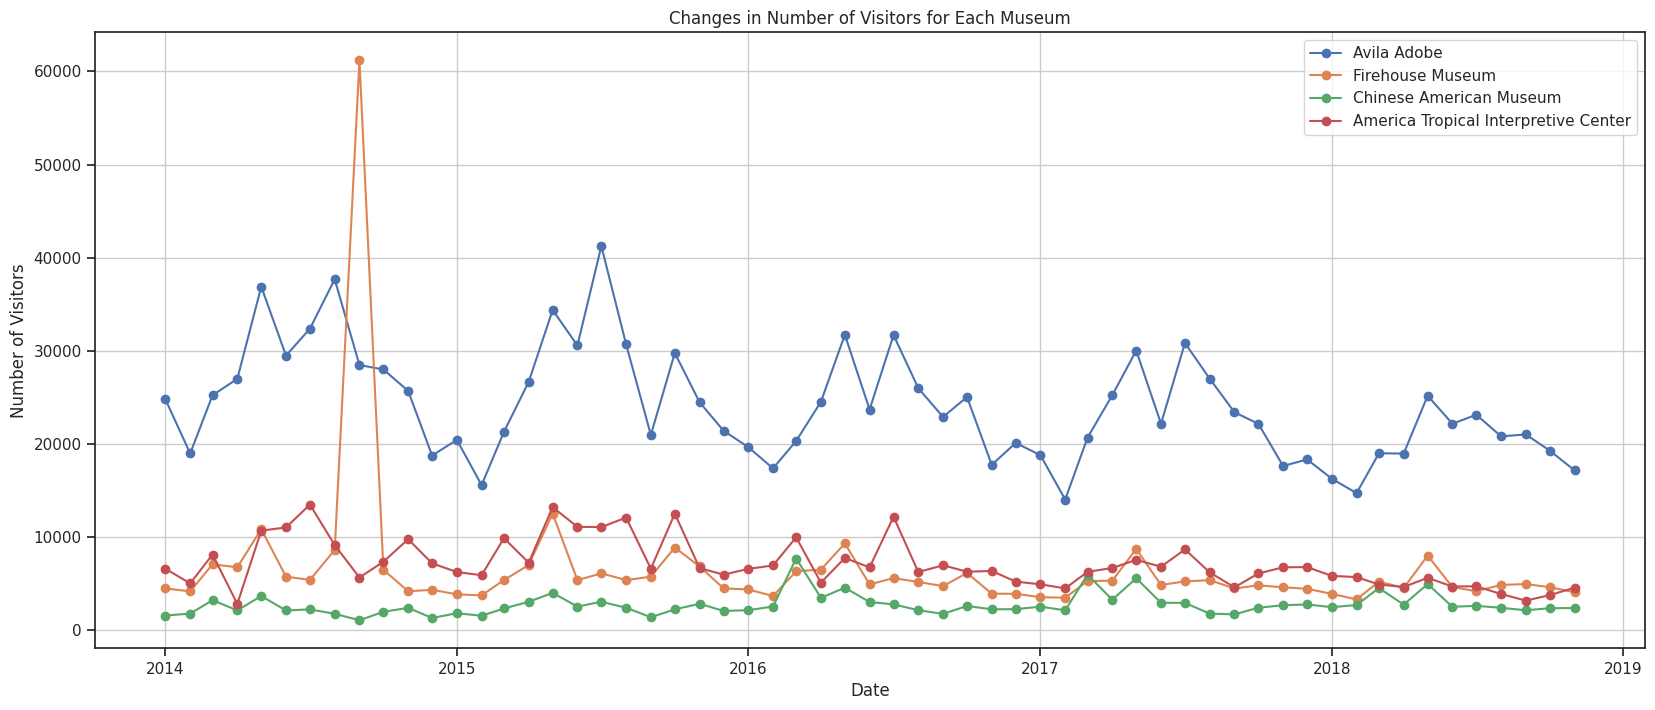

In [7]:
#Your solution here

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(20, 8))

# Plotting Each Museum's Visitor Count
for col in df.columns:
    if col=='Date':
        continue
    plt.plot(df['Date'], df[col], label=col, marker='o')

# # Highlight the month of the claimed event by Firehouse Museum
# claimed_event_month = pd.to_datetime('2014-07-01')
# plt.axvline(claimed_event_month, color='red', linestyle='dashdot', label='Claimed Event by Firehouse Museum')

plt.title('Changes in Number of Visitors for Each Museum')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.legend()
plt.grid(True)
plt.show()


What did you observe from the graph? (2 marks)

Your answer here

* The graph clearly shows us that the Firehouse Museum benefitted alot from the event they ran during the year 2014 and even surpasing the visitors of the all time high - Avila Adobe Museum.

* The x-axis represents time (months), allowing us to observe how the number of visitors to each museum has evolved over the specified period. This is crucial for analyzing the impact of events and making comparisons.

* We can even notice that most of the museums saw a hike in the middle of the year, which could be related with people taking off in holidays and spending their time outdoors.

Why did you choose this type of graph? (2 marks)

You answer here

* The chosen plot is a line graph which showcases the changes in the number of visitors for each museum, allowing us to analyze the visitor trends over the months.

* This is visually elegant and simplifies the presentation of complex visitor data. Its clear representation of trends over time makes it easier for the viewers to understand the impact of events, allowing us to make informed decisions about the budget allocation of the museum and even encouraging others to adopt the successful techniques.

* We can easily identify the upwards and downwards trends and seasonalities that might be associated with events like the one claimed by the Firehouse Museum.

* Hence we can indeed agree there was a spike in the number of visitors at the Firehouse Museum which justifies that the event was incredibily helpful and suggests that more budget should be alloted to a run a similar event which increases the popularity of the museum and brings more visitors again. 

## **PART III**

Using the file in ./CSVs/gas_prices.csv <br>
Use a suitable plot/graph that will show the relationship between the gas price for each country (vs others) over all years. (8 marks)

First, review the data by taking a look at a few of the rows.

In [8]:
# Your solution here
gas_df = pd.read_csv("../in_class/CSV/gas_prices.csv")

gas_df.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


* We can observe that the gas prices in different countries go up and down each year, like how similar to how the prices of various commodities. Some countries always have higher or lower prices. 

* By figuring out the average price for each country, we can see if there are any consecutive years when prices change a lot. One country can also affect each other's prices.

* So, keeping a track of how much gas costs in different places over time helps us analyze and even predict the future prices.

* If we see an empty spot (NaN - Not A Number), it means we don't know the value for that year and it's missing from the dataset.

Then Plot using the most suitable plot on your opinion (5 marks)

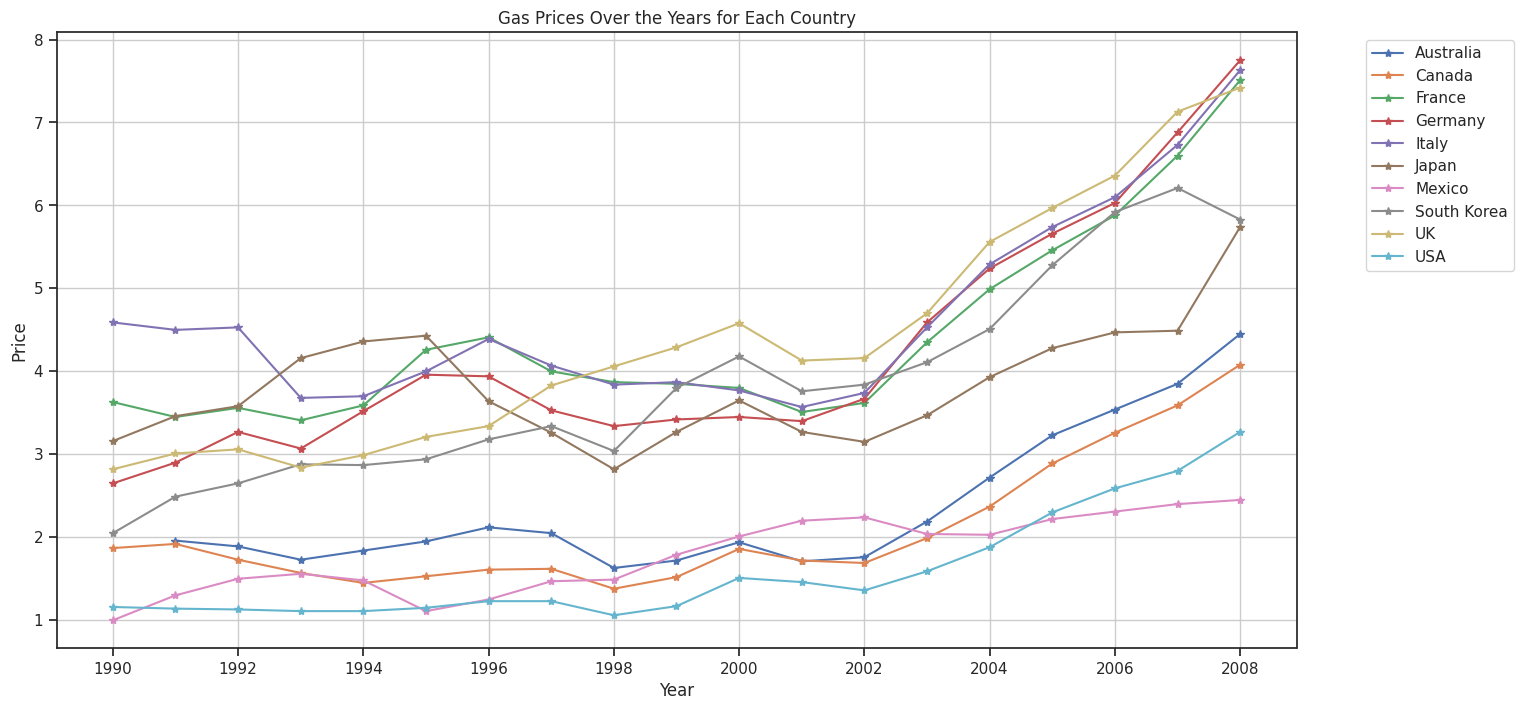

In [9]:
## Your solution here

gas_df['Year'] = pd.to_datetime(gas_df['Year'], format='%Y')

plt.figure(figsize=(16, 8))

for country in gas_df.columns:
    if country=='Year':
        continue
    plt.plot(gas_df['Year'], gas_df[country], label=country, marker='*')

plt.title('Gas Prices Over the Years for Each Country')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.grid(True)
plt.show()


Is there anything interesting observed from the plot/graph? (1 mark)

Your answer here

* We can clearly observe that during the initial period (1990) of the data, the graph showacases that Mexio had the cheapest gas prices while Italy had the highest price. Gradually as time went by and at the ending period (2008) Mexio still offered gas at a cheaper rate than any other country while Germany had the highest gas prices.

* We can also observe that duirng the years 1996 - 2000 every country except UK and Mexio saw a dip in the gas prices which could point to any global influence as this is a general observation across most of the countries.

* An approximation can be considered that all the countries increased their gas prices during this period by double.

* We can even assume that based on the current graph the chances of gas prices coming down to their initial price is not likely.

Why did you choose this type of graph? (2 marks)

You answer here

* The chosen graph summarizes the entire data precisely even allowing us to analyze efficiently by showcasing the exact gas price for every point of time.

* We can observe a spike in gas prices which justifies that certain events or factors globally significantly influenced the market.

* This graph allows us to identifies the trends and patterns of the complex price data which enables us to understand the market dynamics and make informed decisions